## Locally Weighted Linear Regression (LWLR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

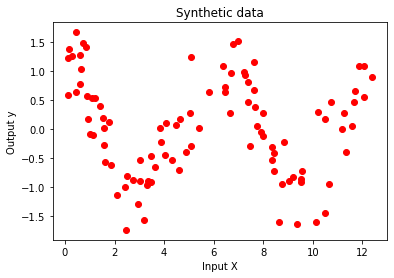

In [2]:
# Generate some data
X = np.random.uniform(0, 4*np.pi,100).reshape(100,1)
X =np.concatenate((np.ones((100,1)), X),1)

y = (np.cos(X[:,1:2]) + np.random.normal(0,0.5,(100,1))).reshape(100,1)

# plot the data
plt.plot(X[:,1],y,'ro')
plt.title('Synthetic data')
plt.xlabel('Input X')
plt.ylabel('Output y')
plt.show()

In [15]:
# split training set into train and validation partitions

m = X.shape[0]
order = np.arange(m)
np.random.shuffle(order)
m_train = int(0.8*m)
m_val = m - m_train
train_indices = order[m_train:]
val_indices = order[:-m_train]
X_train = X[train_indices,:]
y_train = y[train_indices,:]
X_val = X[val_indices,:]
y_val = y[val_indices,:]

In [13]:
# construct the LWLR predicton funtion

def gaussian_kernel(X,x,tau):
    # exp(-(xi-x)^2/(2 tau^2))
    return np.exp(- (X[:,1:2] -x)*(X[:,1:2] -x)/(2*tau*tau))

def weighted_linear_regression(X,y,w):
    w = w.reshape(-1)
    W = np.diag(w.reshape(-1))
    return np.linalg.inv(X.T @ W @ X) @X.T @W @y


# X : Training data inputs
# y : traning data targets
# tau: bandwidth of the kernel
# x: querry point (the one the user wants us to predict for)
def lwlr_predict(X,y,x,tau):
    w = gaussian_kernel(X,x,tau)
    theta = weighted_linear_regression(X,y,w)
    yhat = np.array(([[1, x]]) @ theta)
    return yhat[0,0]

In [19]:
# Find best value of tau using cross validation

def lwlr_val_cost(X_train, y_train, X_val, y_val, tau):
    m_val = X_val.shape[0]
    for i in range(m_val):
        yhat = lwlr_predict(X_train, y_train, X_val[i,1], tau)
        cost = cost + (yhat - y_val[i,0])**2
    cost = cost/m_val
    return cost

taus = np.arange(0.1, 5, 0.1)
val_costs = []

for tau in taus:
    val_costs.append(lwlr_val_cost(X_train, y_train, X_val, y_val, tau))
    

plt.plot(taus,val_costs,'r-')
plt.show()

UnboundLocalError: local variable 'cost' referenced before assignment

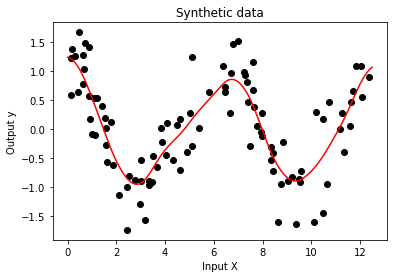

In [14]:
# Plot the prediction for different values of x along with the data
tau = 0.5
x_plot = np.arange(0, 4*np.pi, 0.1)
y_plot = []
for x in x_plot:
    y_plot.append(lwlr_predict(X,y,x,tau))


plt.plot(X[:,1],y,'ko')
plt.plot(x_plot, y_plot,'r-',label='LWLR prediction')
plt.title('Synthetic data')
plt.xlabel('Input X')
plt.ylabel('Output y')
plt.show()